# Анализ оттока клиентов из сети фитнес центров

### Провести анализ оттока клиентов из сети фитнес центров  и подготовить план действий по удержанию клиентов:
### - научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
### - сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
###  -проанализировать основные признаки, наиболее сильно влияющие на отток;
### -сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
###   1) выделить целевые группы клиентов;
###   2) предложить меры по снижению оттока;
###   3) определить другие особенности взаимодействия с клиентами.

## Описание входных данных:
'Churn' — факт оттока в текущем месяце;
Текущие поля в датасете:
Данные пользователя за предыдущий до проверки факта оттока месяц:
'gender' — пол
'Near_Location' — проживание или работа в районе, где находится фитнес-центр
'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)
Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
'Phone' — наличие контактного телефона
'Age' — возраст
'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах)
Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента
'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах)
'Group_visits' — факт посещения групповых занятий
'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента
'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц
'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон

# Шаг 1. Загрузим данные

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster 
from sklearn.cluster import KMeans

In [2]:
gym_churn = pd.read_csv(r"/datasets/gym_churn.csv")

display(gym_churn)
print(gym_churn.info())
for j in gym_churn.columns:
    print()

    print("В колонке  {} зафиксированы следующие уникальные значения: {}.".format(j, gym_churn[j].unique()))

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB
None

В колонке  gender зафиксиров

### Данные загружены. Пропусков данных нет. Все располагаемые значения приведены к необходимым форматам. Данных противоречащих здравой логике не обнаружено.

# Шаг 2. Проведем исследовательский анализ данных (EDA)

## Шаг 2.1. Изучим средние значения и стандартные отклонения

In [3]:
print(gym_churn.describe())

            gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.00

### Из полученных данных мы видим:
### -мы теряем около четверти клиентов
### -количество мужчин и женщин в спортзале распределено примерно поровну. 
### -большая часть людей, посещающих рассматриваемое заведение, проживает или работает рядом.    ### - половина пришла по партнерской программе.
### - у нас есть телефонный номер большинства клиентов
### - треть клиентов пришла в рамках акции «приведи друга»
### - чаще всего люди берут абонимент на половину года



## Шаг 2.2. Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [4]:
gym_group = gym_churn.groupby('Churn')[gym_churn.columns].mean()
display(gym_group)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Churn,,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882,0.0
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546,1.0


### Из полученных данных мы видим, что вероятность оттока клиента меньше, если:
### -человек пришел по партнерской программе
### -человек пришел по акции  приведи друга
### -до окончания обонимента осталось больше двух месяцев ( клиент либо взял долгосрочный абонимент, либо не ищет новый спортзал по завершению оплаченной программы)
### - клиент ходит на дополнительные групповые программы
### - с момента первого обращения в фитнес-центр прошло около пяти месяцев ( клиент стал постоянным, а не пришел попробовать наш сервис)
### - за прошлый месяц клиент посещал спортзал чаще двух раз в неделю

## Шаг 2.3. Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

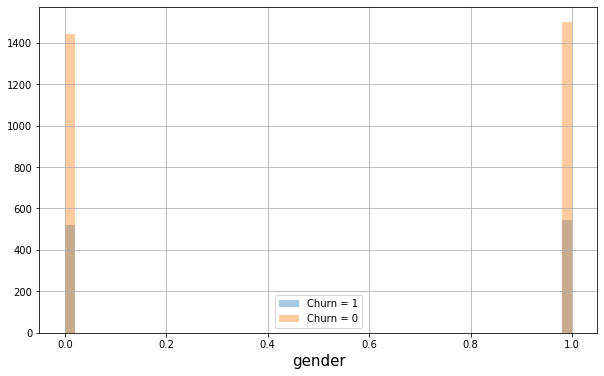

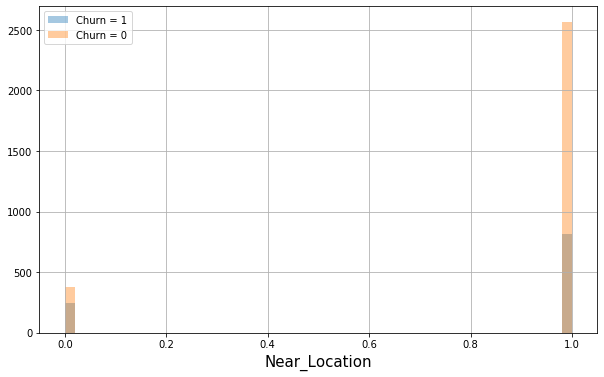

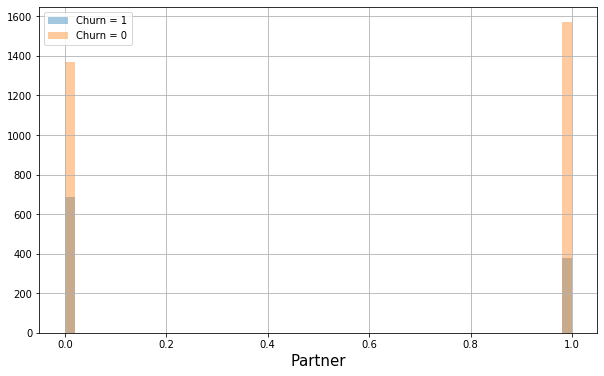

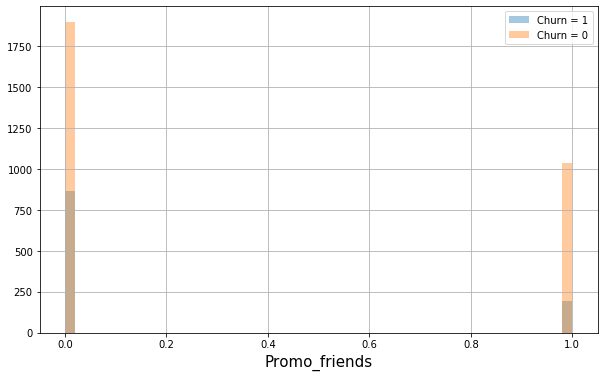

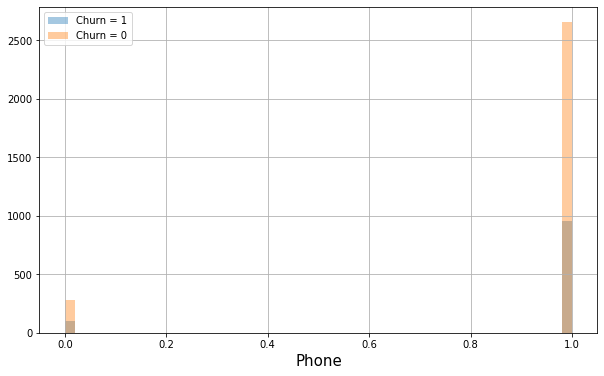

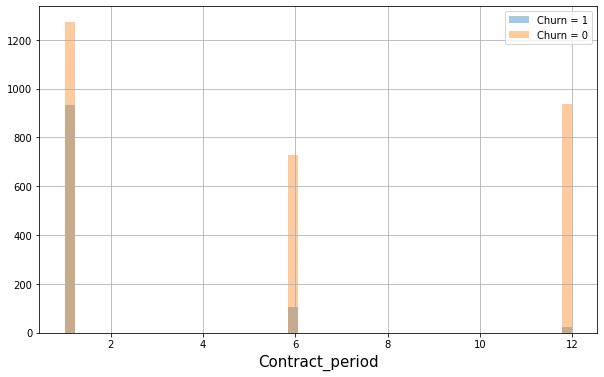

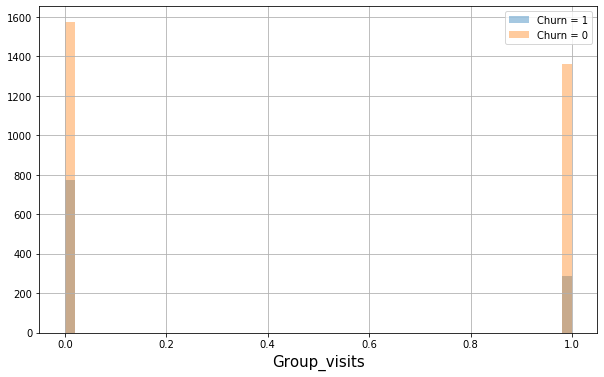

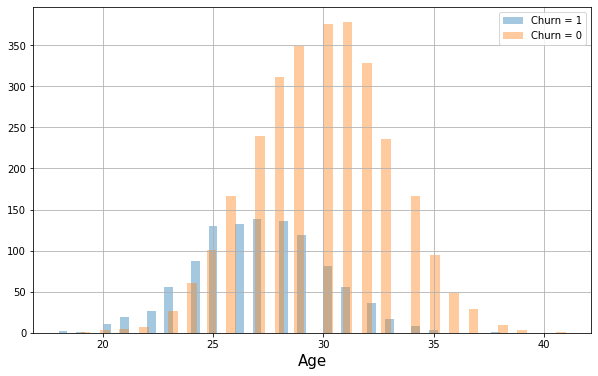

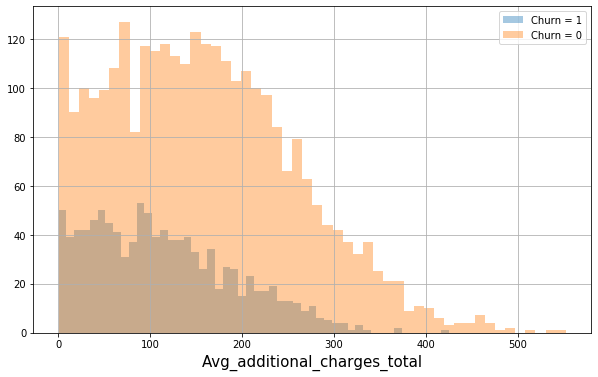

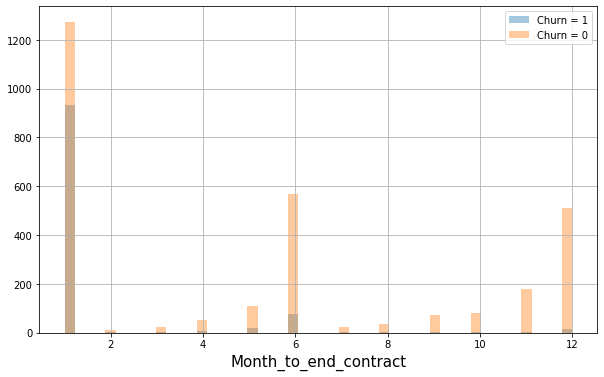

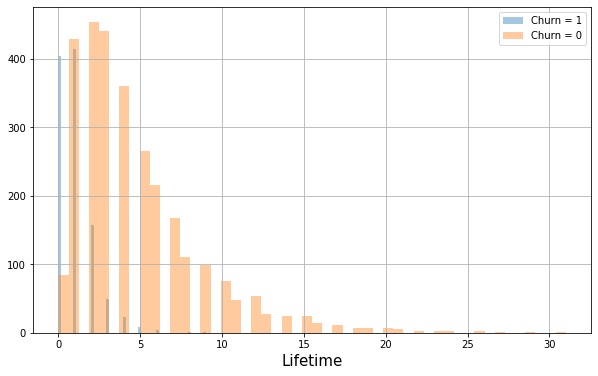

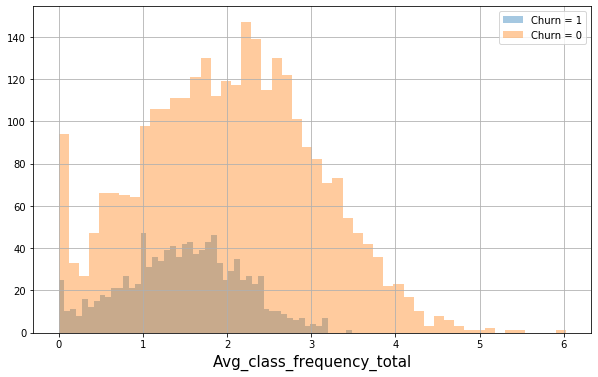

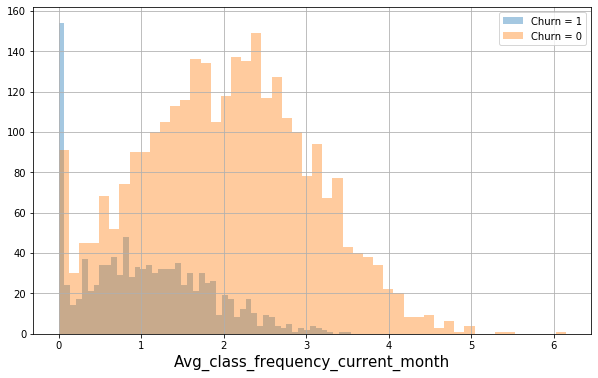

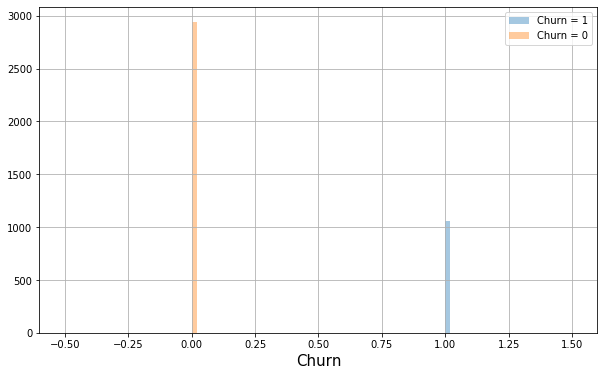

In [5]:
for i in gym_churn.columns:
    gym_churn.query('Churn == 1')[i].hist(bins=50, alpha = 0.4, figsize=(10,6),label='Churn = 1')
    gym_churn.query('Churn == 0')[i].hist(bins=50, alpha = 0.4, figsize=(10,6),label='Churn = 0')
    plt.xlabel(i,fontsize=15)
    plt.legend()
    plt.show()

### Из полученных гистограмм мы видим:
### -чаще всего уходят люди, купившие абонемент на месяц
### -среди постоянных клиентов больше посетителей старше тридцати лет. 
### -если посетитель посещает наш зал больше пяти месяцев, его можно считать постоянным клиентом.    ### - если посетитель посещает спорт зал чаще двух раз в неделю, то скорее всего он станет постоянным клиентом.
### - и среди ушедших клиентов, и среди оставшихся есть группа людей почти не пользовавшихся услугами спорт зала.

## Шаг 2.4. Построим матрицу корреляций и отобразим её

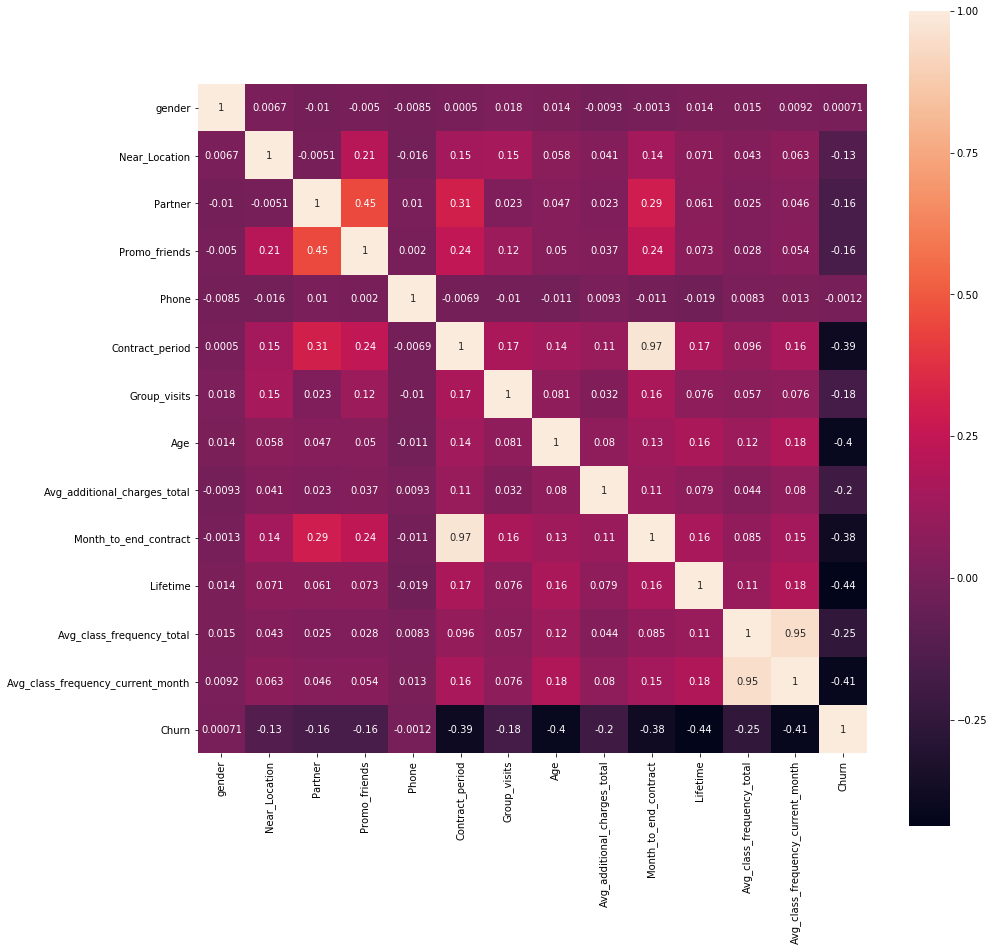

In [6]:
cm =  gym_churn.corr() 
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot = True, square=True)
plt.show()

### Рассмотрев матрицу корреляции мы можем отметить следующее:
### - на лицо обратная зависимость между уходом клиента и такими параметрами как: посещаемость, возраст клиента, время с момента первого обращения, посещение групповых занятий и сроком абонимента.
### - есть прямая зависимость между партнерской программой, акцией "приведи друга" и периодом абонимента. Иными словами, люди подтягивают друг друга и способствуют формированию кластера постоянных клиентов.

# Шаг 3. Построим модель прогнозирования оттока пользователей

## Шаг 3.1.Разобьем данные на обучающую и валидационную выборку

In [7]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = gym_churn.drop(columns = ['Churn'])
y = gym_churn['Churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

## Шаг 3.2. Обучим модель на train-выборке

### Определим функцию, которая принимает на вход модель и данные и выводит метрики

In [8]:
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
    print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
    print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

In [9]:
models = [LogisticRegression(), RandomForestClassifier()]

for i in models:
    print(i)
    make_prediction(i, X_train, y_train, X_test, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy: 0.93
Precision: 0.86
Recall: 0.83
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.91
Precision: 0.83
Recall: 0.79


###  В рассматриваемых моделях метрика accuracy составляет 0.93 и 0.92 соответственно. Это хороший результат, т.к. модели прогнозируют более 90% результатов. 

###   Доля правильных ответов среди целевого класса ( метрика precision) составляет для модели LogisticRegression 0.86, а для модели RandomForestClassifier 0.87.

###   Метрика recall оставляет для модели LogisticRegression 0.83, а для модели RandomForestClassifier 0.79.

###   В целом, модель LogisticRegression проявила себя не значительно лучше.

#   Шаг 4. Выполним кластеризацию пользователей

## Шаг 4.1. Стандартизируйте данные.

In [10]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

## Шаг 4.2. Нарисуем дендрограмму.

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster 
linked = linkage(X_sc, method = 'ward') 
Y = fcluster(linked ,t=50,criterion='distance', R=None, monocrit=None)
print(Y)
#plt.figure(figsize=(15, 10))  
#dendrogram(linked, orientation='top')
#plt.show() 

[2 1 5 ... 1 4 2]


## Шаг 4.3. На основании алгоритма K-Means  спрогнозируем кластеры клиентов.

In [12]:
km = KMeans(n_clusters = 5)
labels = km.fit_predict(X_sc)
gym_churn['cluster'] = labels
display(gym_churn)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,1
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,4
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,1
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0,1
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1,4
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0,1
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0,1


## Шаг 4.4. Проанализируем  средние значения признаков для кластеров.

In [13]:
grouped_cluster=gym_churn.groupby('cluster',as_index=False).mean()
display(grouped_cluster)

,cluster,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,0,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
1,1,0.504478,0.959204,0.783085,0.573134,1.000000,10.913433,0.545274,29.991045,160.816441,9.975124,4.743284,1.978795,1.971188,0.027861
2,2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,3,0.556872,0.976303,0.357820,0.234597,0.998815,2.681280,0.470379,30.110190,161.975769,2.471564,4.882701,2.850141,2.848682,0.068720
4,4,0.486122,1.000000,0.351308,0.239492,1.000000,1.953212,0.341792,28.168914,131.337907,1.861221,2.443299,1.246756,1.011916,0.513878


### Было выделено пять кластеров:

###  -кластер в который были включены клиенты с самым высоким посещением и временем с момента первого обращения. У этого кластера низкий уровень оттока клиентов.

###  -кластер в который были включены клиенты с самым высоким уровнем посещений групповых занятий и люди пришедшие по партнерским программам. У этого кластера самый низкий уровень оттока клиентов.

###  -кластер в который были включены клиенты с смой низкой посещаемостью и временем с момента первого обращения.У этого кластера самый высокий уровень оттока клиентов.

### -кластер в который включены люди у которых параметр Near_Location принимает нулевое значение и самый низкий уровень Promo_friends. Они живут далеко от спортзала и приходят одни. У этого кластера высокий уровень оттока клиентов.

###  -кластер в который были включены люди у которых отсутствует информация о телефонном номере. У этого кластера средний уровень оттока клиентов. 

## Шаг 4.5. Построим распределения признаков для кластеров.

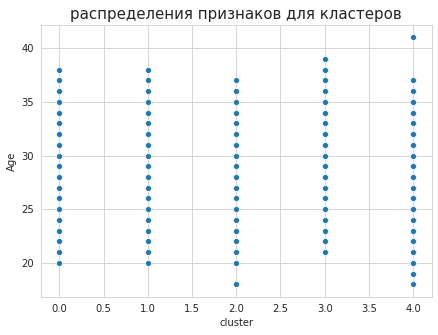

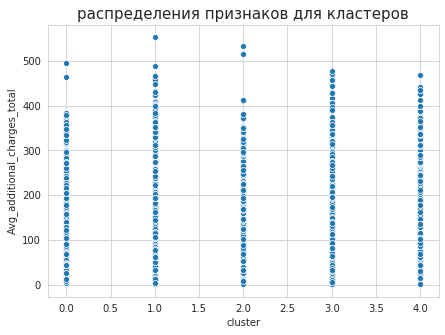

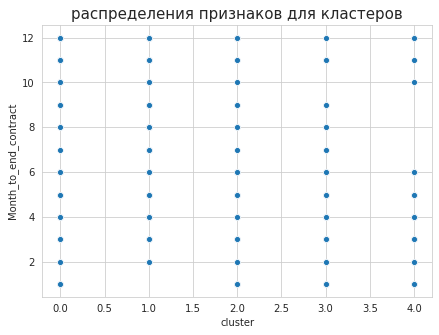

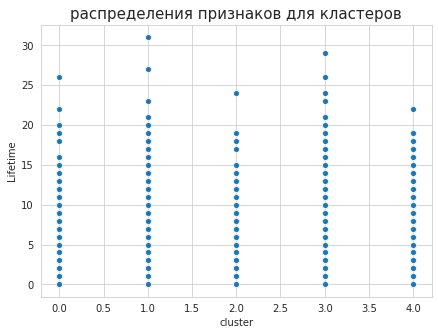

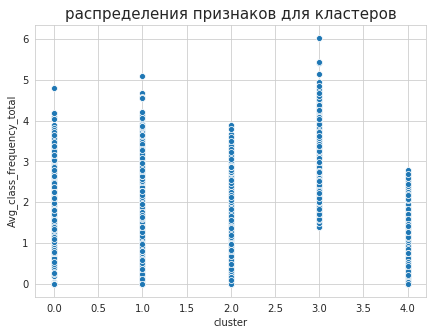

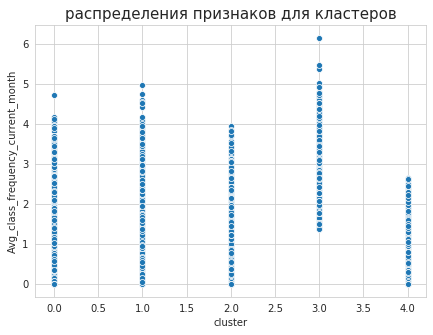

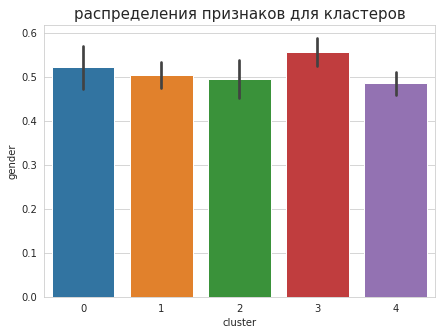

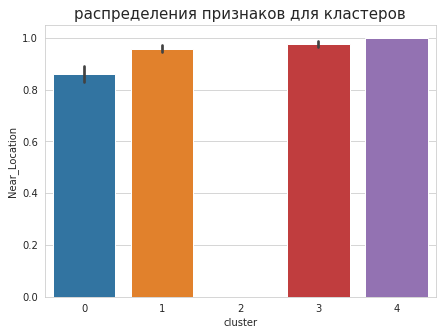

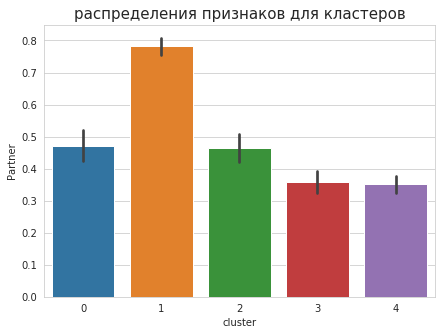

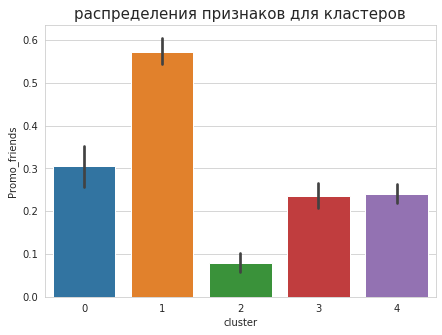

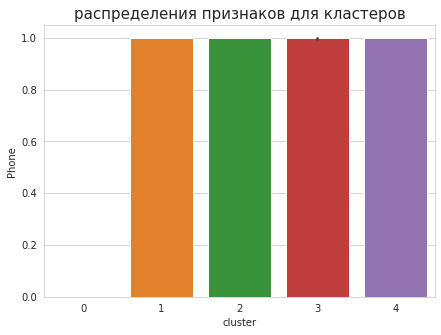

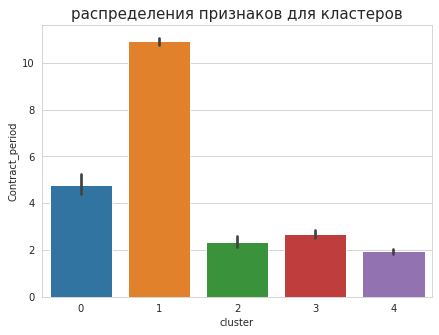

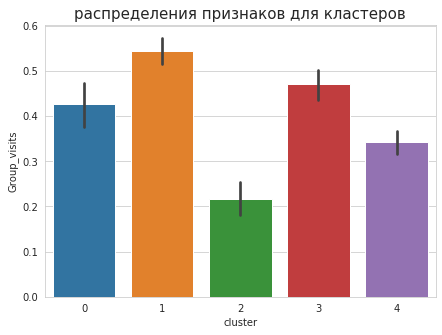

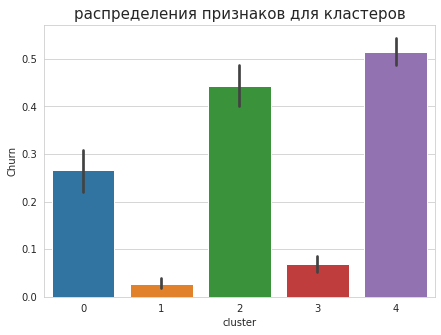

In [14]:
for col in ['Age','Avg_additional_charges_total','Month_to_end_contract','Lifetime','Avg_class_frequency_total','Avg_class_frequency_current_month']:
    plt.figure(figsize=(7, 5))
    sns.set_style('whitegrid')
    plt.title('распределения признаков для кластеров', fontsize=15)
    sns.scatterplot(gym_churn['cluster'], gym_churn[col])
    
for col in ['gender','Near_Location','Partner','Promo_friends','Phone','Contract_period','Group_visits','Churn']:
    plt.figure(figsize=(7, 5))
    sns.set_style('whitegrid')
    plt.title('распределения признаков для кластеров', fontsize=15)
    sns.barplot(x='cluster', y=col,data=gym_churn)


### Кластеры с самым низким оттоком клиентов характеризуются высокими значениеми следующих параметров: 'Lifetime','Avg_class_frequency_total','Avg_class_frequency_current_month','Partner','Promo_friends' ,'Contract_period' и 'Group_visits' 

## Шаг 4.6. Посчитаем долю оттока клиентов для каждого кластера

In [15]:
gym_cluster_group=gym_churn.groupby('cluster')["Churn"].apply(lambda x: ((x.sum()/x.count())*100))
display(gym_cluster_group)

cluster
0    26.753247
1     2.786070
2    44.356436
3     6.872038
4    51.387787
Name: Churn, dtype: float64

## В одном полученном кластере доля оттока достигает более половины клиентов ( кластер в который входят клиенты с самой низкой посещаемостью). В самых успешных же кластерах отток клиентов не превышает 5- 10 %.  Выше мы рассмотрели чем характеризуются данные кластеры. На основе полученных выводов мы можем сформировать маркетинговые рекомендации.

# ВЫВОД
##  Мы провели анализ оттока клиентов из сети фитнес центров и пришли к следующим выводам:
###  1) Самая надежная группа клиентов- это постоянные посетители. Люди, которые регулярно ( больше двух раз в неделю) посещают спорт зал и покупают абонимент от полугода следует предложить программу скидок. В свою очередь та часть клиентов, которая берет пробные абонименты на короткий период еще может стать постоянными клиентами ( однако это вопрос работы персонала фитнес центров). Так же стоить отметить, что среди постоянных клиентов больше людей старше тридцати лет, поэтому если менеджмент решит, что спецпредложение имеет ограничения, это может стать фактором для выявления целевой группы.
###  2) Сильное влияние имеют  акции "приведи друга". У людей появляется стимул оставаться именно в этом спорт клубе, если у него остаются социальные связи. 
###  Этот же вывод относится и к групповым занятиям. При предложении основного абонимента стоит рассмотреть скидки на групповые программы.
###  3) Часть клиентов покидает фитнес клуб  из-за того, что место жительство или работы находится в дали от спорт зала. Стоит рассмотреть методы рекламы, нацелинные на местных жителей и сотрудников близлежащих офисов (посредством усиленного внедрения партнерских программ).
###  4) Так же стоит отметить, что у ряда клиентов неизвестен телефон. Если компания хочет показать клиентоориентированность сервиса, то необходимо найти способы держать связь с постоянными посетителями.